# Twitter Sentimental Analysis

Requirements:
- TwitterAccount

## Get Access to the TwitterAPI



In [23]:
# http://tweepy.readthedocs.io/en/v3.5.0/index.html
import tweepy
from tweepy import OAuthHandler
# https://pandasguide.readthedocs.io/en/latest/
import pandas as pd
# https://numpy.readthedocs.io/en/latest/
import numpy as np
# https://api.mongodb.com/python/current/
import pymongo

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Access and Test the TwitterAPI

In [2]:
# Set the received credentials for your recently created TwitterAPI
CONSUMER_KEY = 'MmiELrtF7fSp3vptCID8jKril'
CONSUMER_SECRET = 'HqtMRk4jpt30uwDOLz30jHqZm6TPN6rj3oHFaL6xFxw2k0GkDC'
ACCESS_TOKEN = '116725830-rkT63AILxR4fpf4kUXd8xJoOcHTsGkKUOKSMpMJQ'
ACCESS_TOKEN_SECRET = 'eKzxfku4GdYu1wWcMr5iusTmhFT35cDWezMU2Olr5UD4i'

# auth with your provided 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create an instance for the TwitterApi
twitter = tweepy.API(auth)
twitter.update_status('tweepy ...')

Status(_api=<tweepy.api.API object at 0x7f5aff88bd30>, _json={'created_at': 'Fri Jan 05 09:15:33 +0000 2018', 'id': 949207734028853248, 'id_str': '949207734028853248', 'text': 'tweepy ...', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://fhj.indba.at" rel="nofollow">fhj.indba.twitterapi</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 116725830, 'id_str': '116725830', 'name': 'l÷te', 'screen_name': 'loete_', 'location': '', 'description': 'next stop: dev/null', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 63, 'friends_count': 394, 'listed_count': 0, 'created_at': 'Tue Feb 23 11:46:59 +0000 2010', 'favourites_count': 7, 'utc_offset': 3600, 'time_zone': 'Amsterdam', 'geo_enabled': False, 'verified': False, 'statuses_count': 343, 'la

## Get some tweets to work with


In [3]:
SCREEN_NAME = "realDonaldTrump"
COUNT = 500

#extract tweets from a user's timeline
tweets = twitter.user_timeline(screen_name=SCREEN_NAME, count=COUNT)
print("{} tweets extracted.\n".format(len(tweets)))

# We print the last 5 tweets
for t in tweets[:5]:
    print(t.text)
    print()

200 tweets extracted.

The Fake News Media barely mentions the fact that the Stock Market just hit another New Record and that business in… https://t.co/skkiYt1Qj2

I authorized Zero access to White House (actually turned him down many times) for author of phony book! I never spo… https://t.co/G8tBCceHUy

MAKING AMERICA GREAT AGAIN! https://t.co/iONbr1DkVk

Thank you to the great Republican Senators who showed up to our mtg on immigration reform. We must BUILD THE WALL,… https://t.co/zKHX30vUMI

Dow just crashes through 25,000. Congrats! Big cuts in unnecessary regulations continuing.



## Creating a DataFrame with pandas


In [4]:
# Create a pandas DataFrame out of the tweets
data = pd.DataFrame(data=[t.text for t in tweets], columns=['Tweets'])

# Diplay the first 5 elements of the DataFrame
display(data.head(5))

,Tweets
0,The Fake News Media barely mentions the fact t...
1,I authorized Zero access to White House (actua...
2,MAKING AMERICA GREAT AGAIN! https://t.co/iONbr...
3,Thank you to the great Republican Senators who...
4,"Dow just crashes through 25,000. Congrats! Big..."


## Extend our DataFrame

In [5]:
# We add relevant data:
data['len']  = np.array([len(t.text) for t in tweets])
data['ID']   = np.array([t.id for t in tweets])
data['Date'] = np.array([t.created_at for t in tweets])
data['Source'] = np.array([t.source for t in tweets])
data['Likes']  = np.array([t.favorite_count for t in tweets])
data['RTs']    = np.array([t.retweet_count for t in tweets])

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,The Fake News Media barely mentions the fact t...,140,949129410208202757,2018-01-05 04:04:20,Twitter for iPhone,51722,12573
1,I authorized Zero access to White House (actua...,140,949126530839572481,2018-01-05 03:52:53,Twitter for iPhone,41505,10993
2,MAKING AMERICA GREAT AGAIN! https://t.co/iONbr...,51,949070800417640454,2018-01-05 00:11:26,Twitter for iPhone,52056,12834
3,Thank you to the great Republican Senators who...,139,949066181381632001,2018-01-04 23:53:05,Twitter for iPhone,87033,20746
4,"Dow just crashes through 25,000. Congrats! Big...",90,948944124132167680,2018-01-04 15:48:04,Twitter for iPhone,98716,20683
5,So beautiful....Show this picture to the NFL p...,93,948881133340708864,2018-01-04 11:37:46,Twitter for iPhone,96676,27235
6,"With all of the failed “experts” weighing in, ...",140,948879774277128197,2018-01-04 11:32:22,Twitter for iPhone,80622,17640
7,"As Americans, you need identification, sometim...",140,948874586006925313,2018-01-04 11:11:45,Twitter for iPhone,131171,34335
8,Many mostly Democrat States refused to hand ov...,140,948872192284155904,2018-01-04 11:02:14,Twitter for iPhone,95314,26825
9,MAKE AMERICA GREAT AGAIN!,25,948739073237311488,2018-01-04 02:13:16,Twitter for iPhone,146577,35198


## Visualisation of basic statistics

In [6]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 124.26


In [7]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of likes: 480350
140 characters.

The tweet with more retweets is: 
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of retweets: 188939
140 characters.



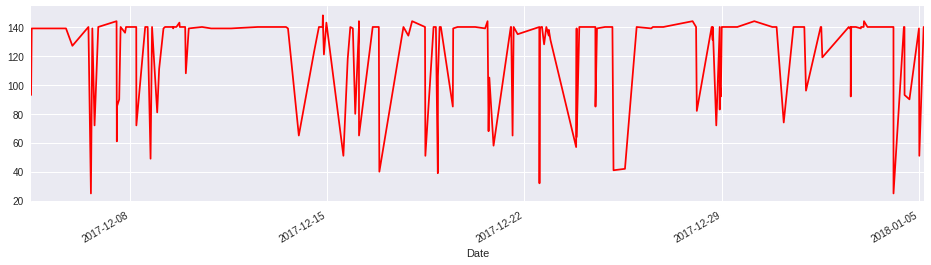

In [8]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

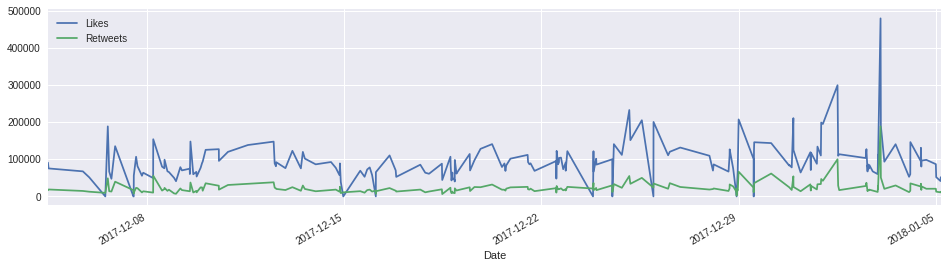

In [9]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [10]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* Media Studio
* Twitter for iPad


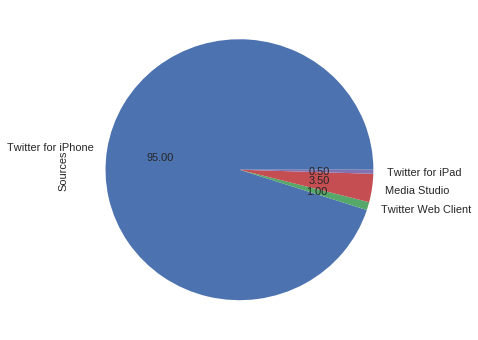

In [11]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Sentiment Analysis


In [12]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [13]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The Fake News Media barely mentions the fact t...,140,949129410208202757,2018-01-05 04:04:20,Twitter for iPhone,51722,12573,-1
1,I authorized Zero access to White House (actua...,140,949126530839572481,2018-01-05 03:52:53,Twitter for iPhone,41505,10993,1
2,MAKING AMERICA GREAT AGAIN! https://t.co/iONbr...,51,949070800417640454,2018-01-05 00:11:26,Twitter for iPhone,52056,12834,1
3,Thank you to the great Republican Senators who...,139,949066181381632001,2018-01-04 23:53:05,Twitter for iPhone,87033,20746,1
4,"Dow just crashes through 25,000. Congrats! Big...",90,948944124132167680,2018-01-04 15:48:04,Twitter for iPhone,98716,20683,-1
5,So beautiful....Show this picture to the NFL p...,93,948881133340708864,2018-01-04 11:37:46,Twitter for iPhone,96676,27235,1
6,"With all of the failed “experts” weighing in, ...",140,948879774277128197,2018-01-04 11:32:22,Twitter for iPhone,80622,17640,-1
7,"As Americans, you need identification, sometim...",140,948874586006925313,2018-01-04 11:11:45,Twitter for iPhone,131171,34335,1
8,Many mostly Democrat States refused to hand ov...,140,948872192284155904,2018-01-04 11:02:14,Twitter for iPhone,95314,26825,1
9,MAKE AMERICA GREAT AGAIN!,25,948739073237311488,2018-01-04 02:13:16,Twitter for iPhone,146577,35198,1


In [14]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 56.0%
Percentage of neutral tweets: 22.5%
Percentage de negative tweets: 21.5%


## Stream tweets to mongoDB

In [ ]:
from pymongo import MongoClient
import json
import datetime
from pymongo.errors import ConnectionFailure
client = MongoClient('localhost',27017)
db = client.test
collection = db.test

try:
    # The ismaster command is cheap and does not require auth.
    client.admin.command('ismaster')
except ConnectionFailure:
    print("Server not available")
    

post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

post_id = collection.insert_one(post).inserted_id
print(post_id)

In [36]:
def save_to_mongo(data, mongo_db, mongo_db_coll, **mongo_conn_kw):
    # Connects to the MongoDB server running on
    # localhost:27017 by default
    client = pymongo.MongoClient('172.17.0.3',27017)
    # Get a reference to a particular database
    db = client[mongo_db]
    # Reference a particular collection in the database
    coll = db[mongo_db_coll]
    # Perform a bulk insert and return the IDs
    return coll.insert_one(data)

post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

print(save_to_mongo(post, 'test', 'posts'))

In [42]:
import json
import pymongo
import tweepy 

class CustomStreamListener(tweepy.StreamListener):
    def __init__(self, twitter):
        self.twitter = twitter
        super(tweepy.StreamListener, self).__init__()

        self.db = pymongo.MongoClient('mongodb://twittermongo:27017/').test

    def on_data(self, tweet):
        self.db.tweets.insert_one(json.loads(tweet))
        print('Tweet added')

    def on_error(self, status_code):
        return True # Don't kill the stream

    def on_timeout(self):
        return True # Don't kill the stream


sapi = tweepy.streaming.Stream(auth, CustomStreamListener(twitter))
sapi.filter(track=['Meltdown'])

ServerSelectionTimeoutError: twittermongo:27017: [Errno -3] Temporary failure in name resolution